## Before we Begin:
If you liked my work, please upvote this kernel since it will keep me motivated to perform more in-depth reserach towards further datasets and produce more accurate models

# 1.Introduction
**International Business Machines Corporation (IBM)** is an American multinational technology company headquartered in Armonk, New York, with operations in over 170 countries. The company began in 1911, founded in Endicott, New York, as the Computing-Tabulating-Recording Company (CTR) and was renamed "International Business Machines" in 1924. IBM is incorporated in New York.

There are many factors for an employee working in IBM to get chucked out. The dataset I adopted got a lot of factors involved for an employee to get laid off. Hope the dataset will unveil the answers when we get onto the analysis
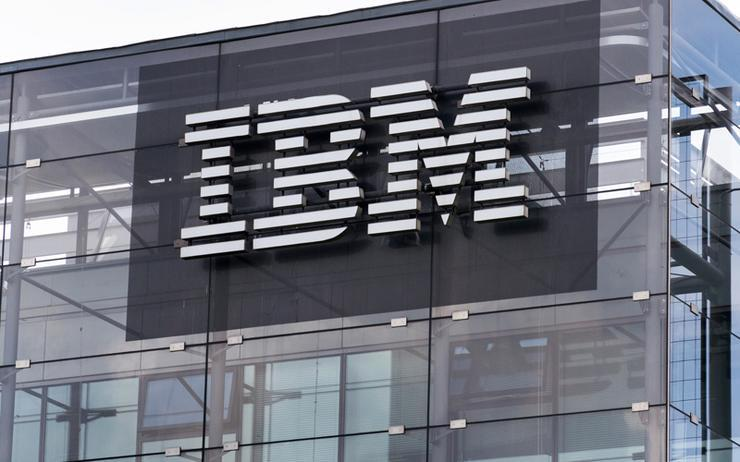

# 2.Kernel Goals

There are three primary goals of this kernel. 
* Do a **statistical analysis** of the employee attrition dataset
* Do an **exploratory data analysis(EDA)** of the employee attrition dataset
* **Predict:** Why employees are getting laid off? and which factor influences more towards attrition? 
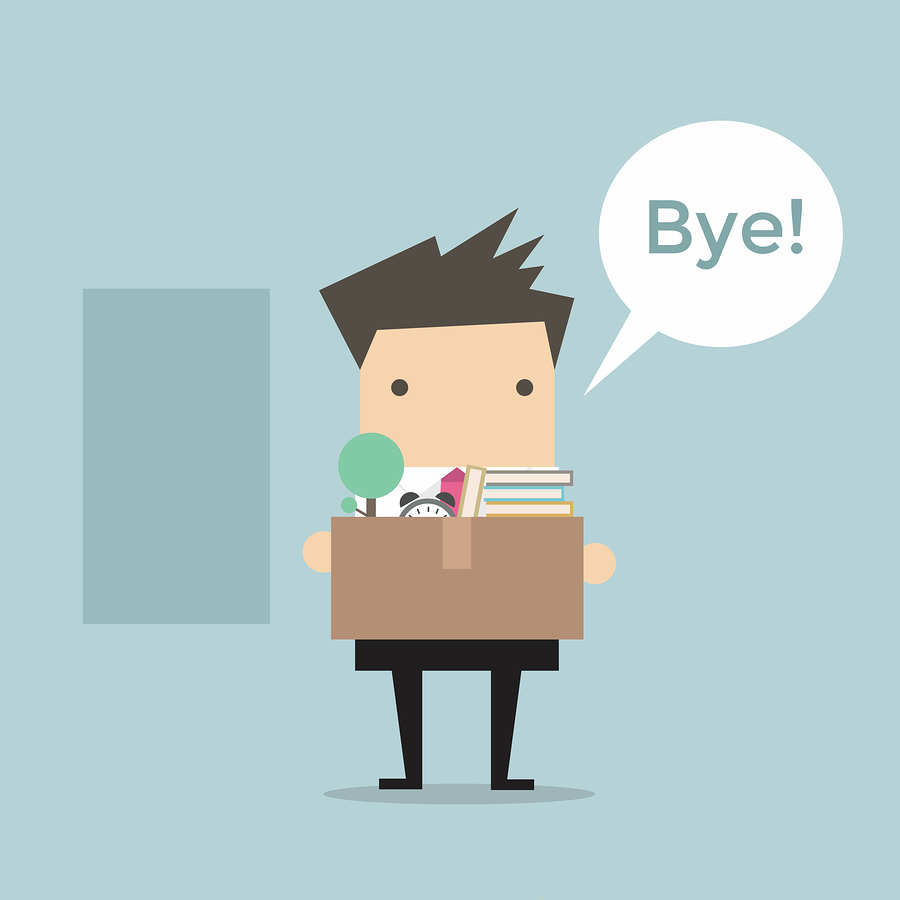

# 3. Importing libraries and exploring Data

##  3a.Importing Libraries
Python is a fantastic language with a vibrant community that produces many amazing libraries. I am not a big fan of importing everything at once for the newcomers. So, I am going to introduce a few necessary libraries for now, and as we go on, we will keep unboxing new libraries when it seems appropriate


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time



#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.


## 3b.Importing Visualization and ML Libraries
It is important for an analysis to have data visualization and develop machine learning models to get accurate prediction. Here we are going use sklearn and matplotlib for machine learning and plotting respectively 

In [ ]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import autocorrelation_plot

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

## 3c.Extracting Data


In [ ]:
#Loading the single csv file to a variable named 'data'
HR=pd.read_csv("../input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")

## 3d.Examining Dataset

In [ ]:
#Lets look at a glimpse of table
HR.head()

From the head of data we can clearly identify **Attrition factor as the target/outcome variable** and rest of the factors are **predictor variables**

In [ ]:
#Lets look at no.of columns and information about its factors
print ("The shape of the  data is (row, column):"+ str(HR.shape))
print (HR.info())

Woof! We have nearly ***1470 records *** and ***35 factors*** . We need to do a build a lot of models to get an accurate prediction

In [ ]:
#Looking at the datatypes of each factor
HR.dtypes

After loading the dataset we can see a number of things. These 35 columns provide a very rich amount of information for deep data exploration we can do on this dataset. We have **26 numerical data** and **9 categorical data **

## 3e.Checking for missing data
Datasets in the real world are often messy, However, this dataset is almost clean. Lets analyze and see what we have here.

In [ ]:
import missingno as msno 
msno.matrix(HR);

Woah. This data set seems to have no missing values,Phew. Now we don't need to clean or fill any NaN values, But lets confirm it numerically as well

In [ ]:
print('Data columns with null values:',HR.isnull().sum(), sep = '\n')

As you see we have **0 null records**, lets get this party started !! 


Before jumping into the visualizations, Let's look at the **unique values** of few factors

In [ ]:
print("Gender classification:",HR.Gender.value_counts(),sep = '\n')
print("-"*40)
print("Business Travel:",HR.BusinessTravel.value_counts(),sep = '\n')
print("-"*40)
print("Departments:",HR.Department.value_counts(),sep = '\n')
print("-"*40)
print("Educational Field:",HR.EducationField.value_counts(),sep = '\n')
print("-"*40)
print("Job Roles:",HR.JobRole.value_counts(),sep = '\n')
print("-"*40)

Fine, We got a little idea about what is in dataset, Lets start visualizing the data

# 4.Data Visualization
Before we dive into finding relations between independent variables and our dependent variable(attrition), let us create some assumptions about how the relations may turn-out among features.

**Assumptions:**

* **Education:** Lower education status employees were laid off more than with higher education status
* **Age:** Older employees were laid off more than younger employees
* **Job Satisfaction:** Employees with low satisfaction were laid off than one with higher satisfaction
* **Environment Satisfaction:** Employees with low satisfaction were laid off than one with higher satisfaction
* **Relationship Satisfaction:** Employees with low satisfaction were laid off than one with higher satisfaction
* **Years at company:** Employees who had less work experience in that company were laid off
* **Stock Option:** Employees with lower stock option were laid off
* **Work Life balance:** Employees with poor work life balance were laid off
* **Job Involvement:** Employees with lower Job involvement were laid off
* **Over Time:** Employees who never worked overtime were laid off

Now, let's see how the features are related to each other by creating some visualizations.

## 4a.Count of categorical Variable-Bar Chart
Let's look at the count in each category to assess the records

In [ ]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
plt.subplot(331)
label = LabelEncoder()
HR['EducationField'] = label.fit_transform(HR['EducationField'])
sns.countplot(HR['EducationField'],)
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(332)
sns.countplot(HR['Gender'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(333)
sns.countplot(HR['JobInvolvement'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(334)
sns.countplot(HR.JobSatisfaction)
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(335)
sns.countplot(HR.EnvironmentSatisfaction)
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(336)
sns.countplot(HR.RelationshipSatisfaction)
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(337)
sns.countplot(HR.OverTime)
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(338)
sns.countplot(HR.WorkLifeBalance)
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(339)
sns.countplot(HR.StockOptionLevel)
fig = plt.gcf()
fig.set_size_inches(10,10)


**Inferences:**
* Candidates who has done their bachelor degree are employeed more
* There are more male employees
* Majority of the employees show greater involvement
* Majority of the employees are showing greater satisfaction(Job,Environment,Relationship)
* Only few employees work overtime
* Majority of the employees seem to handle their Work Life Balance well
* Majority of the employees have zero stocks in the company

## 4b. Visualizing Distribution of features

In [ ]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
plt.subplot(331)
sns.distplot(HR['Age'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(332)
sns.distplot(HR['DistanceFromHome'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(333)
sns.distplot(HR['DailyRate'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(334)
sns.distplot(HR['YearsAtCompany'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(335)
sns.distplot(HR['TotalWorkingYears'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(336)
sns.distplot(HR['NumCompaniesWorked'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(337)
sns.distplot(HR['MonthlyRate'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(338)
sns.distplot(HR['MonthlyIncome'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(339)
sns.distplot(HR['PercentSalaryHike'])
fig = plt.gcf()
fig.set_size_inches(10,10)

**Inference:**
* Monthly and Daily Rates has proportional normal distribution
* Most of the features except age parameter are right skewed

Should we standardize this data ? Let's see that before the analysis

## 4c.Age Distribution-Histogram

In [ ]:
plt.figure(figsize=(20,5))
plt.hist(HR.Age,bins=20)
plt.xlabel("Age")
plt.ylabel("Counts")
plt.title("Age Counts")
plt.show()

From the age distribution histogram, we can conclude that employees aged between **30-40 are working in IBM**

## 4d. Department Distribution-Pie Chart

In [ ]:
# Code forked from- https://www.kaggle.com/roshansharma/fifa-data-visualization
labels = ['R&D', 'Sales', 'HR']
sizes = HR['Department'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0.1, 0.1, 0.2]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True)
plt.title('Department Distribution', fontsize = 20)
plt.legend()
plt.show()

The given dataset has majority of employees from Research and Development followed by Sales and HR department 

## 4e. Distribution of Salary across Job Roles-Boxplot

In [ ]:
plt.rcParams['figure.figsize'] = (16, 8)
ax = sns.boxplot(x = HR['JobRole'], y =HR['MonthlyIncome'], data = HR, palette = 'inferno')
ax.set_xlabel(xlabel = 'Names of Job Roles', fontsize = 20)
ax.set_ylabel(ylabel = 'Monthly Income', fontsize = 20)
ax.set_title(label = 'Distribution of Salary across Job Roles', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()

**Inference**
* Highest average monthly income(17500) is given to Managers
* Lowest average monthly income(2500) is given to Sales Representative, But there are many outliers in Sales Representative income
* Research Scientist, Laboratory Technician and HR gets almost same average income


## 4f.Relationship with working years and income- Joint & lm Plot

In [ ]:
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
sns.jointplot(x='TotalWorkingYears', y='MonthlyIncome', data=HR)

In [ ]:
sns.lmplot(x = 'TotalWorkingYears', y = 'MonthlyIncome', data = HR, col = 'Attrition')
plt.show()

**Inference**
* Employees who had less working years were receiving comparitively lower salary
* There are many fresher employees working in IBM 
* Most of the employees who got laid off had less working years(fresher and junior level) and they were receiving less salary
* Very few people from senior category and receiving higher income got laid off

## 4g.Relationship of predictor factors with Attrition-Swarm Plot

In [ ]:
plt.figure(figsize = (15, 7))
plt.style.use('fivethirtyeight')
plt.subplot(131)
sns.swarmplot(x="Attrition", y="Age", data=HR)
plt.subplot(132)
sns.swarmplot(x="Attrition", y="MonthlyIncome", data=HR)
plt.subplot(133)
sns.swarmplot(x="Attrition", y="YearsAtCompany", data=HR)

**Inference**
* Employees within the age band of 25-35 were laid off at a huge rate
* Employees who were receiving less monthly income(2500-5000) were laid off
* Employees who had less working years(0-5) in the company were laid off

## 4h.Gender vs Monthly Income

In [ ]:
fig,ax = plt.subplots(figsize=(10,7))
sns.violinplot(x='Gender', y='MonthlyIncome',hue='Attrition',split=True,data=HR)

**Inference**
* Woah ! Both the genders weren't discriminated in income and the attrition is at the same rate in both the cases


## 4i.Relationship with Age and Monthly income-Pair plot

In [ ]:
plt.style.use('ggplot')
g = sns.pairplot(HR, vars=["MonthlyIncome", "Age"],hue="Attrition",size=5)

**Inference**
* The Income band widens for elder employees between 40-60 years of age and the income band restricts to 10000 for 20-30 year old employees
* The employee who were laid off falll under low income(5000-1000) and young age(20-30) category

## 4j.Correlation between Factors- Heatmap

In [ ]:
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(HR.corr(),annot=True,linewidths=0.5,linecolor="green",fmt=".1f",ax=ax)
plt.show()

**Inference-**
**The band which has lighter colour has high correlation**
* Boxes in lower right corner have high correlation,but those are relationship between their working period which obviously correlates and has nothing to aid for our objective, so we neglect that
* Job level and Monthly income has perfect positive correlation which means higher the job level, better the income
* Also Job level has high correlation with Working years, when the employyee's year of working increases he/she is being promoted based on seniority
* There is also a high correlation between Monthly Income and Total working years which depicts that employees earn higher income owing to their seniority with the firm

# 5. Machine learning models

Before jumping onto creating models we have to prepare our dataset for the models. We dont have to perform imputation as we dont have any missing values but we have categorical variables which needs to be encoded.

## Encoding the Categorical Variables

Now lets extract the data into the one which has categorical values into a variable and encode it 

In [ ]:
s = (HR.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Encoding the categorical data with the help of **LabelEncoder()** function gifted by sci-kit learn package !

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
label_data = HR.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(HR[col])

In [ ]:
s = (label_data.dtypes == 'object')
print(list(s[s].index))

Now we don't have any categorical values in our dataset. Let's look at the top records to see it visually

In [ ]:
label_data.head()

Neat, perfect numericals to feed our models. Now, let us split input and output variables

## Setting feature and target variable

In [ ]:
data_features=['Age','EnvironmentSatisfaction',
               'Gender','JobInvolvement', 'JobLevel', 'JobRole',
               'JobSatisfaction','MonthlyIncome','PerformanceRating',
               'TotalWorkingYears','YearsAtCompany','OverTime']
X=label_data[data_features]
y=label_data.Attrition

Our goal is to check whether an employee got laid off or not. So we assume **Attrition** as our target(y) and rest of the features as predictor variables(X)

## 5a. Pipelines and Random Forest Regressor

Creating a pipline and fitting to the Random Forest Regressor model, then we measure Mean Absolute Error to check the deviation from observed and predicted values 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

my_pipeline = Pipeline(steps=[('model', RandomForestRegressor(n_estimators=50,
                                                              random_state=0))])

## Calculating MAE(Mean Absolute Error)
**Mean Absolute Error** is a  model evaluation metric used with  regression models. The mean absolute error of a model with respect to a  test set is the mean of the absolute values of the individual prediction errors on over all  instances in the  test set. Each prediction error is the difference between the true value and the predicted value for the instance.


In [ ]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)
print("Average MAE score (across experiments):",scores.mean())

Great we have an average error of **0.22** . This is spot on !

## 5b. Cross Validation and Data Leakage
**Data leakage** refers to a mistake make by the creator of a machine learning model in which they accidentally share information between the test and training data-sets. Typically, when splitting a data-set into testing and training sets, the goal is to ensure that no data is shared between the two

## Calculating Accuracy
We use 5 folds cross validation score and check for the model accuracy

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Since there is no preprocessing, we don't need a pipeline (used anyway as best practice!)
my_pipeline = make_pipeline(RandomForestClassifier(n_estimators=100))
cv_scores = cross_val_score(my_pipeline, X, y, 
                            cv=5,
                            scoring='accuracy')

print("Cross-validation accuracy: %f" % cv_scores.mean())

**85% accuracy**. Not great, Not terrible. Lets look at improving the validation accuracy

## Dropping potential leakage features
Let's drop few features which has the potential for data leakage feature and validate the model

In [ ]:
# Drop leaky predictors from dataset
potential_leaks = ['EnvironmentSatisfaction', 'JobSatisfaction', 'PerformanceRating', 'JobInvolvement']
X2 = X.drop(potential_leaks, axis=1)

# Evaluate the model with leaky predictors removed
cv_scores = cross_val_score(my_pipeline, X2, y, 
                            cv=5,
                            scoring='accuracy')

print("Cross-val accuracy: %f" % cv_scores.mean())

**84% accuracy**, The model performed bad compared to the earlier. Do you have any suggestions on imporving this model accuracy ? Should I have considered some other features? Drop some comments and help me

## Splitting into training and test dataset
Now let's split our dataset into training and test/validation data for both feature and label variables

In [ ]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [ ]:
val_y.head()

## 5c. Logistic Regression model and accuracry
Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes. Mathematically, a logistic regression model predicts P(Y=1) as a function of X.

In [ ]:
#Code forked from -https://www.kaggle.com/vanshjatana/applied-machine-learning
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 500000)
model.fit(train_X, train_y)
y_pred = model.predict(val_X)
accuracy = model.score(val_X, val_y)
print(accuracy)

**82% accuracy** for our Logistic Regression model. Not bad for the first try !

## 5d. Decision Tree Regressor
Decision Tree is a decision-making tool that uses a flowchart-like tree structure or is a model of decisions and all of their possible results, including outcomes, input costs and utility.Decision-tree algorithm falls under the category of supervised learning algorithms. It works for both continuous as well as categorical output variables. Now we are creating the function directly to get Mean Absolute error to fasten up our coding

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

## For different leaf nodes
Let's check MAE at each leaf nodes of our decision tree

In [ ]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Absolute 0 error on each leaf nodes!

## 5e. Random Forest Regressor
A **Random Forest** is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap Aggregation, commonly known as bagging. The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# function for comparing different approaches
def score_dataset(train_X, val_X, train_y, val_y):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(train_X, train_y)
    preds = model.predict(val_X)
    return mean_absolute_error(val_y, preds)

In [ ]:
print("Mean Absolute error of the Model:")
print(score_dataset(train_X, val_X, train_y, val_y))

MAE of **0.2** . Great, Now lets boost our model using XGBoost

## 5f. XGBoost
**XGBoost** is an algorithm that has recently been dominating applied machine learning and Kaggle competitions for structured or tabular data. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance

In [ ]:
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
my_model.fit(train_X, train_y, 
             early_stopping_rounds=5, 
             eval_set=[(val_X, val_y)], 
             verbose=False)
predictions = my_model.predict(val_X)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, val_y)))

MAE of **0.24** ! Great

## Confusion Matrix
A **confusion matrix** is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(val_y, predictions.round())
conf_matrix

The confusion matrix output is not clear and doesn't satisfy us, So let's make it visually beautiful

In [ ]:
plt.subplots(figsize=(5,5))
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ['{0:0.0f}'.format(value) for value in conf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

**Inference from Confusion matrix**
* The model has mostly predicted the employees who weren't laid off - **True Negative**
* But it had a minor flaw, as nearly 13.04% became **False Negative**( which means the model has said employees were laid off when they weren't)
* The model has 5.43% of correct prediction when the employees where actually laid off- **True Positive**
* Nearly 3.53% of predictions where **False Positive** when the model predicted the employees weren't laid off when they actually were

## The Notebooks is still in progres..
## Hit upvote if you like my work and also comment for suggestions to improve my model accuracy 